### START

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 500)

sns.set_color_codes(palette='deep')

### Loading data

In [2]:
# Percent of penalties scored by left and right footed player
# Relation b/w gk height and goal - boxplot height y axis, x axis scored missed saved
# Shot direction vs gk height
# Favorite vs scored frequency metrics
# Location vs scored metrics
# Derby vs scored metrics

In [3]:
df = pd.read_excel("SixAlt.xlsx")
df = df.rename(columns={'Importantness Game': 'Importance'})
df['Height of GK'] = df['Height of GK'].replace("?", np.nan).astype(float)

df.loc[df['Favourite'] < 0, 'Favourite_group'] = 'Underdog'
df.loc[df['Favourite'] > 0, 'Favourite_group'] = 'Favourites'
df['Favourite_group'] = df['Favourite_group'].fillna("N/A")

df.loc[df['Lead-Deficit'] < 0, 'Lead-Deficit_group'] = 'Losing'
df.loc[df['Lead-Deficit'] > 0, 'Lead-Deficit_group'] = 'Winning'
df['Lead-Deficit_group'] = df['Lead-Deficit_group'].fillna("N/A")

df.head(2)

,Date,penalty rejected?,Player,Nation,player position,foot,age,Age in groups,GK,Great GK?,GK already saved one,Height of GK,Height GK grouped,Team,Club/National Team,Table Position,Opponent,Opponent Table position,Favourite,Favoruite grouped,Location (H-A-N),Matchday,Round Number,competition,competition grouped,special Match?,Derby,special Match summary,Importance,Importantness game grouped,Ingame-Shootout?,Actual Result*,Result including first game,Result,Lead-Deficit,Unnamed: 35,Minute,Minute Pars,Number Shooter,Decider?,Shot Direction,Shot Direction 6 fields,Direction simple,Status,Schusshärte,Schuss hart ja nein,Platziert?,GK Stand,Movement?,Sort of Movement,GK Dive,tapped the ball?,J-Colour Player,J-Colour GK,right dive?,Replied??,Replied -Direction before,Replied-Status,Replied- GK dive,last penalty direction,last penalty 6 alt,last penalty,last GK dive,2-last direction,2-last penalty,2-last GK dive,Days since last penalty,in month,help month,in weeks,SH team last direction,Unnamed: 71,SH Team last pen,SH last gk dive tp,SH opponent last penalty,Opponents last status,perc l,perc c,perc r,Number Penalty,Number left,Number central,Number right,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,perc 1,perc 2,perc 3,perc 4,perc 5,perc 6,perc 7,perc 8,perc 9,no 1,no 2,no 3,no 4,no 5,no 6,no 7,no 8,no 9,perc1,perc2,perc3,perc4,perc5,perc6,no 1.1,no 2.1,no 3.1,no 4.1,no 5.1,no 6.1,ID,SR1,SRGK1,SR2,SRGK2,SR3,SRGK3,SR4,SRGK4,SR5,SRGK5,SR6,SRGK6,MP1,MPGK1,MP2,MPGK2,MP3,MPGK3,MP4,MPGK4,MP5,MP6,MPGK6,Choice,Favourite_group,Lead-Deficit_group
0,2006-07-09,NaN,Abidal,France,DF,L,26,26,Buffon,yes,no,192.0,192,France,National Team,-,Italy,-,0.0,0,N,-,Final,WM,WM,yes,yes,yes,5,important,Shootout,3:1,-,3:1,-2,-2,-,-,6,no,7,4,Left,Goal,normal,no,no,central,no,still,Right,no,White,Gold,no,no,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,1,Missed,Right,1,Goal,0.0,0.0,0.0,1,1,0,0,-,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0.064655,NaN,0.037879,NaN,0.033019,NaN,0.168565,NaN,0.242236,NaN,0.184388,NaN,0.12069,NaN,0.159091,NaN,0.15566,NaN,0.039863,NaN,0,0.02288,NaN,4,N/A,Losing
1,2010-07-02,NaN,Abreu,Uruguay,ST,L,33,33,Kingson,no,no,193.0,193,Uruguay,National Team,-,Ghana,-,0.0,0,N,-,Quarter-Final,WM,WM,no,no,no,4,important,Shootout,3:2,-,3:2,1,+1,-,-,9,yes,5,5,Center,Goal,weak,no,no,central,no,still,Left,no,Blue,Black,no,no,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,3,Missed,Left,9,Saved,0.0,0.0,0.0,1,0,1,0,-,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,2,0.064655,NaN,0.037879,NaN,0.033019,NaN,0.168565,NaN,0.242236,NaN,0.184388,NaN,0.12069,NaN,0.159091,NaN,0.15566,NaN,0.039863,NaN,0,0.02288,NaN,5,N/A,Winning


In [4]:
df.groupby(['Importantness game grouped', 'Importance']).size()

Importantness game grouped  Importance
important                   4              496
                            5              128
normal                      3             1600
unimportant                 1               43
                            2               91
dtype: int64

In [5]:
df['Importantness game grouped'].value_counts()

normal         1600
important       624
unimportant     134
Name: Importantness game grouped, dtype: int64

In [26]:
figure = px.pie(df, values=df['Club/National Team'].value_counts().values,
                names=df['Club/National Team'].value_counts().index,
                title='Penalty Distribution')

figure.update_traces(textposition='inside', 
                     text=df['Club/National Team'].value_counts(),
                     textinfo='percent+label+text',
                     insidetextfont=dict(color='white'))

figure.update_layout(
    font=dict(
        size=18,  # Set the font size here
#         color="RebeccaPurple"
    )
)

plt.savefig(f'Output_Plots/Penalty distribution.png', dpi=300)
figure.show()

<Figure size 432x288 with 0 Axes>

In [7]:
def goal_frequency(df, cols):
    df1 = df.groupby(cols, dropna=False).agg({'Status': 'size'}).rename(columns={'Status': '# of Penalties'})
    df1 = df1.unstack("Status")
    df1.columns=df1.columns.get_level_values(1)
    df1.iloc[:, :] = (df1.iloc[:, :] / df1.sum(axis=1)[:, None]).mul(100).round(2)
    df1 = df1.reset_index()
    return df1

def draw_hist(df, x, hue, fig):
    df = goal_frequency(df, [hue, x])
    df = df.set_index(hue).stack().reset_index()
    df.columns = [hue, x, '# of Penalties']

#     axarr = f.add_subplot(1,1,1) # here is where you add the subplot to f
    sns.catplot(x = x, y='# of Penalties', 
                hue = hue, data=df, 
                kind='bar')
#     plt.tight_layout()
    plt.ylim(0, 100)
    hue = hue.strip("?")
    plt.savefig(f'Output_Plots/{x} vs {hue}.png', dpi=300)
    return f

### Foot vs Status

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 720x360 with 0 Axes>

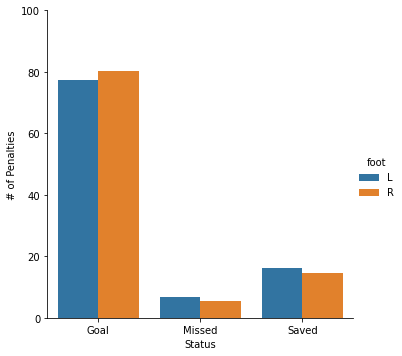

In [8]:
fig_size = (10, 5)
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', 'foot', fig=f)

### Height vs Status

<AxesSubplot:xlabel='Status', ylabel='Height of GK'>

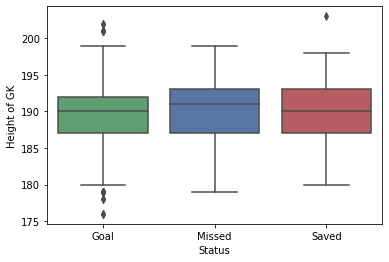

In [9]:
sns.boxplot(x='Status', y='Height of GK', data=df, palette=['g', 'b', 'r'])

### Shot Direction vs Height

<AxesSubplot:xlabel='Shot Direction 6 fields', ylabel='Height of GK'>

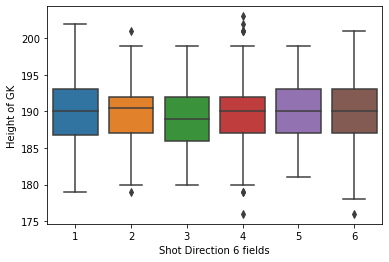

In [10]:
sns.boxplot(x='Shot Direction 6 fields', y='Height of GK', data=df)
# palette=['g', 'b', 'r']

In [11]:
df.head(2)

,Date,penalty rejected?,Player,Nation,player position,foot,age,Age in groups,GK,Great GK?,GK already saved one,Height of GK,Height GK grouped,Team,Club/National Team,Table Position,Opponent,Opponent Table position,Favourite,Favoruite grouped,Location (H-A-N),Matchday,Round Number,competition,competition grouped,special Match?,Derby,special Match summary,Importance,Importantness game grouped,Ingame-Shootout?,Actual Result*,Result including first game,Result,Lead-Deficit,Unnamed: 35,Minute,Minute Pars,Number Shooter,Decider?,Shot Direction,Shot Direction 6 fields,Direction simple,Status,Schusshärte,Schuss hart ja nein,Platziert?,GK Stand,Movement?,Sort of Movement,GK Dive,tapped the ball?,J-Colour Player,J-Colour GK,right dive?,Replied??,Replied -Direction before,Replied-Status,Replied- GK dive,last penalty direction,last penalty 6 alt,last penalty,last GK dive,2-last direction,2-last penalty,2-last GK dive,Days since last penalty,in month,help month,in weeks,SH team last direction,Unnamed: 71,SH Team last pen,SH last gk dive tp,SH opponent last penalty,Opponents last status,perc l,perc c,perc r,Number Penalty,Number left,Number central,Number right,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,perc 1,perc 2,perc 3,perc 4,perc 5,perc 6,perc 7,perc 8,perc 9,no 1,no 2,no 3,no 4,no 5,no 6,no 7,no 8,no 9,perc1,perc2,perc3,perc4,perc5,perc6,no 1.1,no 2.1,no 3.1,no 4.1,no 5.1,no 6.1,ID,SR1,SRGK1,SR2,SRGK2,SR3,SRGK3,SR4,SRGK4,SR5,SRGK5,SR6,SRGK6,MP1,MPGK1,MP2,MPGK2,MP3,MPGK3,MP4,MPGK4,MP5,MP6,MPGK6,Choice,Favourite_group,Lead-Deficit_group
0,2006-07-09,NaN,Abidal,France,DF,L,26,26,Buffon,yes,no,192.0,192,France,National Team,-,Italy,-,0.0,0,N,-,Final,WM,WM,yes,yes,yes,5,important,Shootout,3:1,-,3:1,-2,-2,-,-,6,no,7,4,Left,Goal,normal,no,no,central,no,still,Right,no,White,Gold,no,no,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,1,Missed,Right,1,Goal,0.0,0.0,0.0,1,1,0,0,-,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0.064655,NaN,0.037879,NaN,0.033019,NaN,0.168565,NaN,0.242236,NaN,0.184388,NaN,0.12069,NaN,0.159091,NaN,0.15566,NaN,0.039863,NaN,0,0.02288,NaN,4,N/A,Losing
1,2010-07-02,NaN,Abreu,Uruguay,ST,L,33,33,Kingson,no,no,193.0,193,Uruguay,National Team,-,Ghana,-,0.0,0,N,-,Quarter-Final,WM,WM,no,no,no,4,important,Shootout,3:2,-,3:2,1,+1,-,-,9,yes,5,5,Center,Goal,weak,no,no,central,no,still,Left,no,Blue,Black,no,no,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,3,Missed,Left,9,Saved,0.0,0.0,0.0,1,0,1,0,-,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,2,0.064655,NaN,0.037879,NaN,0.033019,NaN,0.168565,NaN,0.242236,NaN,0.184388,NaN,0.12069,NaN,0.159091,NaN,0.15566,NaN,0.039863,NaN,0,0.02288,NaN,5,N/A,Winning


In [12]:
# Percent of penalties scored by left and right footed player
# Relation b/w gk height and goal - boxplot height y axis, x axis scored missed saved
# Shot direction vs gk height
# Favorite vs scored frequency metrics
# Location vs scored metrics
# Derby vs scored metrics

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

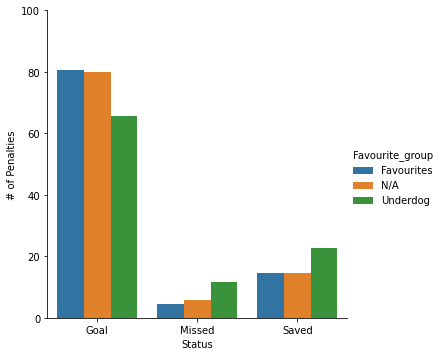

In [13]:
fig_size = (5,10)
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', 'Favourite_group', fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

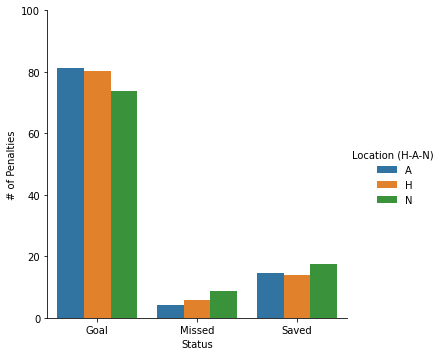

In [14]:
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', 'Location (H-A-N) ', fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

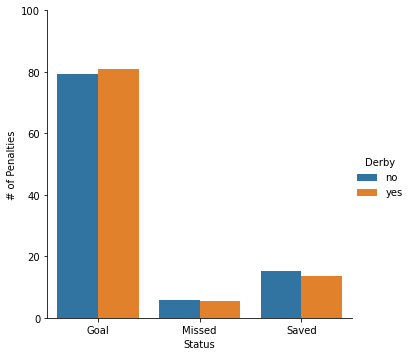

In [15]:
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', 'Derby', fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

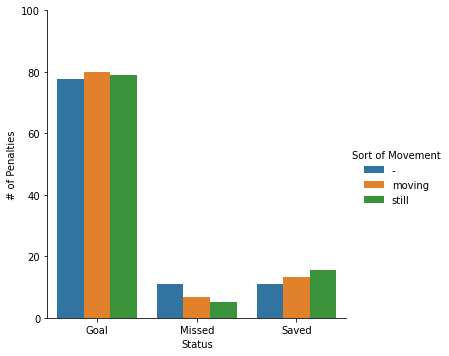

In [16]:
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', 'Sort of Movement', fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

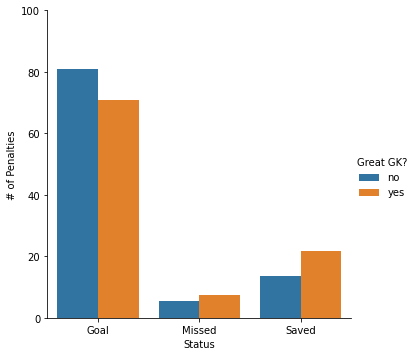

In [17]:
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', 'Great GK?', fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_34704/2392220835.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

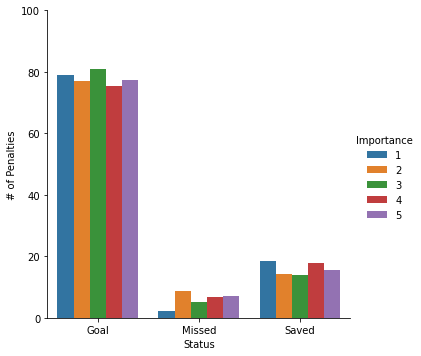

In [18]:
f = plt.figure(figsize=fig_size)
f = draw_hist(df, 'Status', 'Importance', fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_17736/3267715840.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

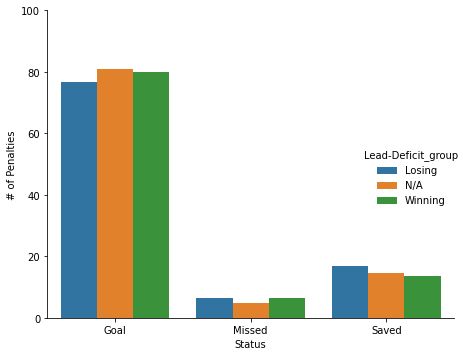

In [17]:
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', "Lead-Deficit_group", fig=f)

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_17736/3267715840.py:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Figure size 360x720 with 0 Axes>

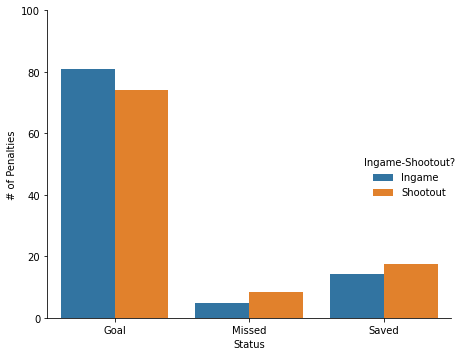

In [18]:
f = plt.figure(figsize=fig_size)
f= draw_hist(df, 'Status', "Ingame-Shootout?", fig=f)

In [19]:
# df.groupby(['Favourite', 'Favoruite grouped']).size()

In [20]:
df['Derby'].value_counts()

no     2030
yes     327
Name: Derby, dtype: int64

In [21]:
df['Favoruite grouped'].value_counts()

0           1448
+0.5         380
0            247
Underdog     102
+2            91
+1            90
Name: Favoruite grouped, dtype: int64

In [22]:
df['Direction simple'].value_counts(normalize=True)

Left      0.470738
Right     0.405004
Center    0.124258
Name: Direction simple, dtype: float64

In [23]:
df['Shot Direction'].value_counts()

7    725
9    631
4    241
6    197
1    144
3    127
5    112
8    101
2     80
Name: Shot Direction, dtype: int64

In [24]:
df.groupby(['Direction simple', 'Shot Direction']).size()

Direction simple  Shot Direction
Center            2                  80
                  5                 112
                  8                 101
Left              1                 144
                  4                 241
                  7                 725
Right             3                 127
                  6                 197
                  9                 631
dtype: int64

### Distribution of data acc to year

In [25]:
df["Year"] = pd.to_datetime(df['Date']).dt.year
round(df["Year"].value_counts(normalize=True) * 100, 2)

2020    15.01
2019    14.97
2018    12.30
2021    10.52
2016     8.35
2017     6.66
2014     5.47
2015     5.47
2012     4.62
2013     3.77
2010     3.48
2011     2.46
2006     2.37
2008     1.82
2009     1.40
2007     0.98
2005     0.21
2004     0.13
Name: Year, dtype: float64

### # of penalties scored by every player in each year

In [26]:
player_stats = df.groupby(['Year', 'Player', 'Status'], as_index=False, dropna=False).size().sort_values(["Year", "Player"], ascending=[False, False])
player_stats = player_stats.rename(columns={"size": "# of shots"})
player_stats["Total penalties"] = player_stats.groupby(['Year', 'Player'], dropna=False)["# of shots"].transform("sum")
player_stats['% target'] = round(player_stats['# of shots'] / player_stats['Total penalties'] * 100, 2)
player_stats[player_stats['Status'] == "Goal"]

,Year,Player,Status,# of shots,Total penalties,% target
1157,2021,Özcan,Goal,1,1,100.0
1155,2021,Wekesser,Goal,1,1,100.0
1153,2021,Weghorst,Goal,1,2,50.0
1152,2021,Waris,Goal,1,1,100.0
1151,2021,Wamangituka,Goal,1,1,100.0
...,...,...,...,...,...,...
4,2005,Ronaldo,Goal,2,2,100.0
3,2005,Messi,Goal,2,2,100.0
2,2005,Agüero,Goal,1,1,100.0
1,2004,Ronaldo,Goal,1,1,100.0


In [27]:
player_stats = df.groupby(['Player', 'Status'], as_index=False, dropna=False).size().sort_values(["Player"], ascending=[False])
player_stats = player_stats.rename(columns={"size": "# of shots"})
player_stats["Total penalties"] = player_stats.groupby(['Player'], dropna=False)["# of shots"].transform("sum")
player_stats['% target'] = round(player_stats['# of shots'] / player_stats['Total penalties'] * 100, 2)
player_stats[player_stats['Status'] == "Goal"]

,Player,Status,# of shots,Total penalties,% target
628,Özil,Goal,1,3,33.33
627,Özcan,Goal,2,2,100.00
626,van Persie,Goal,2,2,100.00
625,dè Guzmán,Goal,1,1,100.00
624,de Sciglio,Goal,1,1,100.00
620,Zuber,Goal,1,2,50.00
618,Zidane,Goal,2,2,100.00
616,Zeitz,Goal,1,1,100.00
611,Yakin,Goal,1,1,100.00
608,Xabi Alonso,Goal,1,3,33.33
